# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

2.7405481096219244 0.39038021839729903
2.7445489097819564 0.38669375235790715
2.7485497099419884 0.3830010967511509
2.7525505101020205 0.37930231068308135
2.7565513102620525 0.3755974533578758
2.7605521104220845 0.3718865840768907
2.7645529105821165 0.3681697622377119
2.7685537107421485 0.3644470473332044
2.7725545109021805 0.3607184989505595
2.7765553110622125 0.35698417677034183
2.7805561112222446 0.3532441405655332
2.7845569113822766 0.34949845020057657
2.7885577115423086 0.3457471656304173
2.7925585117023406 0.34199034689954394
2.7965593118623726 0.3382280541410268
2.8005601120224046 0.3344603475755556
2.8045609121824366 0.3306872875104755
2.8085617123424687 0.3269089343388218
2.8125625125025007 0.3231253485383533
2.8165633126625327 0.31933659067058423
2.8205641128225647 0.3155427213798149
2.8245649129825967 0.3117438013921611
2.8285657131426287 0.3079398915145818
2.8325665133026607 0.3041310526339062
2.8365673134626928 0.300317345715859
2.8405681136227248 0.29649883180408443
2.844

-0.605233120367668
5.637127425485097 -0.6020434549672192
5.641128225645129 -0.5988441530301105
5.645129025805161 -0.5956352657655861
5.649129825965193 -0.592416844536317
5.653130626125225 -0.5891889408575781
5.6571314262852574 -0.5859516063964241
5.6611322264452895 -0.5827048929708625
5.6651330266053215 -0.5794488525490239
5.6691338267653535 -0.5761835372483304
5.6731346269253855 -0.5729089993346616
5.6771354270854175 -0.5696252912215173
5.6811362272454495 -0.5663324654691794
5.6851370274054815 -0.56303057478387
5.689137827565514 -0.559719672016908
5.693138627725545 -0.5563998101638639
5.697139427885577 -0.5530710423637083
5.701140228045609 -0.5497334218979664
5.705141028205641 -0.5463870021898615
5.709141828365673 -0.5430318368034609
5.713142628525705 -0.5396679794428189
5.717143428685737 -0.5362954839511163
5.721144228845769 -0.5329144043097995
5.725145029005801 -0.5295247946377162
5.729145829165833 -0.5261267091902485
5.733146629325865 -0.5227202023584454
5.737147429485897 -0.519305

0.7386457969105926
8.597719543908783 0.7359429781908365
8.601720344068815 0.7332283796876937
8.605721144228847 0.7305020448520607
8.609721944388879 0.7277640173226906
8.61372274454891 0.725014340925494
8.617723544708943 0.7222530596728377
8.621724344868975 0.7194802177628404
8.625725145029007 0.7166958595786649
8.629725945189039 0.713900029687808
8.63372674534907 0.7110927728413868
8.637727545509103 0.7082741339734229
8.641728345669135 0.7054441582001226
8.645729145829167 0.7026028908191553
8.649729945989197 0.6997503773089291
8.653730746149229 0.6968866633278583
8.657731546309261 0.69401179471364
8.661732346469293 0.6911258174825156
8.665733146629325 0.6882287778285345
8.669733946789357 0.6853207221228163
8.673734746949389 0.6824016969128072
8.677735547109421 0.6794717489215355
8.681736347269453 0.6765309250468641
8.685737147429485 0.6735792723607388
8.689737947589517 0.670616838108436
8.69373874774955 0.6676436697078058
8.697739547909581 0.6646598147485129
8.701740348069613 0.6616653

-0.7733029617201771
11.68633726745349 -0.7707601254895394
11.690338067613522 -0.7682049521790049
11.694338867773554 -0.7656374826876499
11.698339667933586 -0.7630577581113682
11.702340468093618 -0.7604658197422134
11.70634126825365 -0.7578617090677371
11.710342068413683 -0.755245467770326
11.714342868573715 -0.7526171377265338
11.718343668733747 -0.7499767610064116
11.722344468893779 -0.7473243798728341
11.72634526905381 -0.7446600367808229
11.730346069213843 -0.7419837743768677
11.734346869373875 -0.739295635498243
11.738347669533907 -0.7365956631723226
11.742348469693939 -0.7338839006158911
11.74634926985397 -0.7311603912344522
11.750350070014003 -0.7284251786215334
11.754350870174035 -0.7256783065579887
11.758351670334067 -0.7229198190112978
11.762352470494099 -0.7201497601348621
11.76635327065413 -0.7173681742672982
11.770354070814163 -0.714575105931728
11.774354870974195 -0.7117705998350665
11.778355671134227 -0.7089547008673053
11.782356471294259 -0.7061274541007951
11.7863572714

14.79495899179836 0.7913440357345162
14.798959791958392 0.7888917354038302
14.802960592118424 0.7864268077717987
14.806961392278456 0.7839492922929915
14.810962192438488 0.7814592286234642
14.81496299259852 0.7789566566201235
14.818963792758552 0.7764416163400892
14.822964592918584 0.7739141480400534
14.826965393078616 0.7713742921756355
14.830966193238648 0.768822089400735
14.83496699339868 0.7662575805668809
14.838967793558712 0.7636808067225774
14.842968593718744 0.7610918091126475
14.846969393878776 0.758490629177572
14.850970194038808 0.7558773085528272
14.85497099419884 0.7532518890682173
14.858971794358872 0.7506144127472059
14.862972594518904 0.7479649218062425
14.866973394678936 0.7453034586540876
14.870974194838968 0.7426300658911333
14.874974994999 0.7399447863087216
14.878975795159032 0.7372476628884593
14.882976595319064 0.7345387388015304
14.886977395479096 0.7318180574080048
14.890978195639129 0.7290856622561441
14.89497899579916 0.7263415970817053
14.898979795959193 0.7

17.423484696939386 -0.9895455891356972
17.42748549709942 -0.9889606741089025
17.43148629725945 -0.9883599294011892
17.435487097419482 -0.9877433646283056
17.439487897579514 -0.9871109896592222
17.443488697739546 -0.9864628146159733
17.44748949789958 -0.9857988498734954
17.45149029805961 -0.9851191060594608
17.455491098219643 -0.9844235940541078
17.459491898379675 -0.9837123249900662
17.463492698539707 -0.9829853102521793
17.46749349869974 -0.9822425614773216
17.47149429885977 -0.9814840905542127
17.475495099019803 -0.9807099096232269
17.479495899179835 -0.9799200310761988
17.483496699339867 -0.9791144675562251
17.4874974994999 -0.9782932319574619
17.49149829965993 -0.9774563374249189
17.495499099819963 -0.9766037973542483
17.499499899979995 -0.975735625391531
17.503500700140027 -0.974851835433058
17.50750150030006 -0.9739524416251075
17.51150230046009 -0.9730374583637192
17.515503100620123 -0.9721069002944633
17.519503900780155 -0.9711607823122065
17.523504700940187 -0.9701991195608732

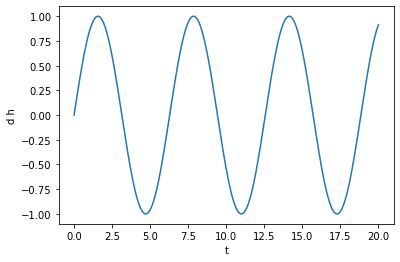

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

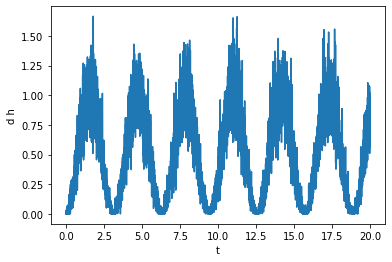

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

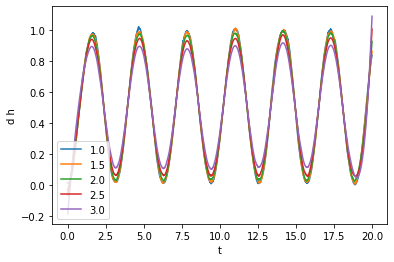

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

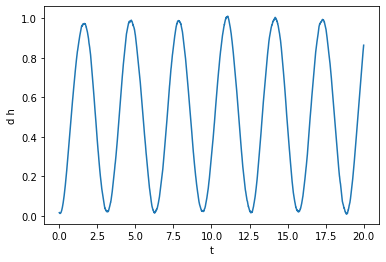

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1342


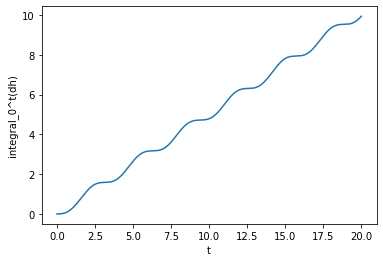

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

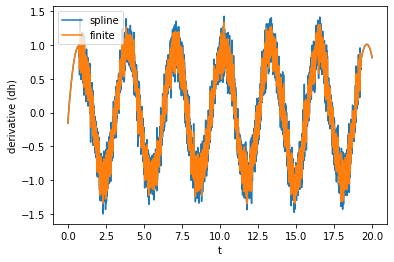

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

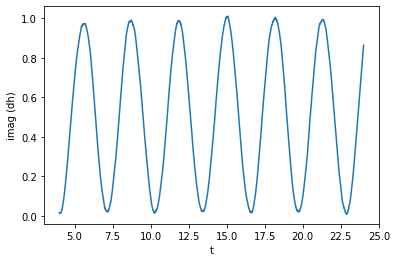

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

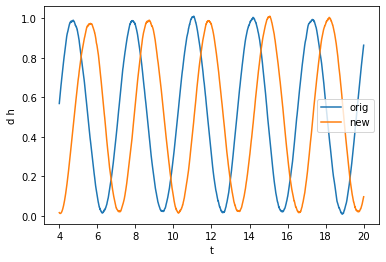

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

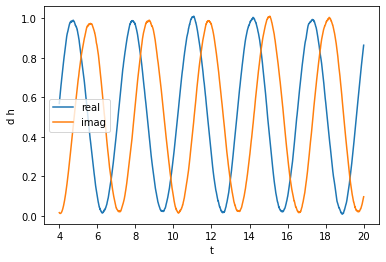

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

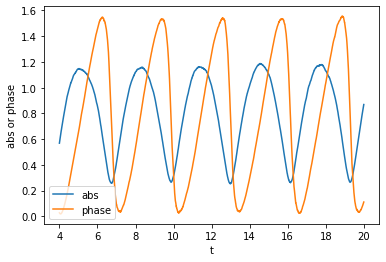

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

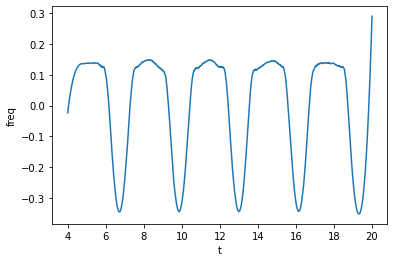

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

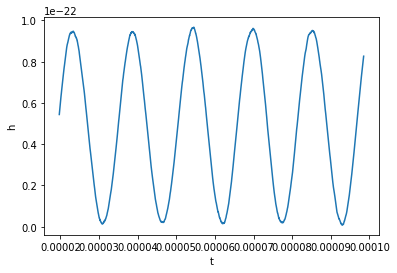

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

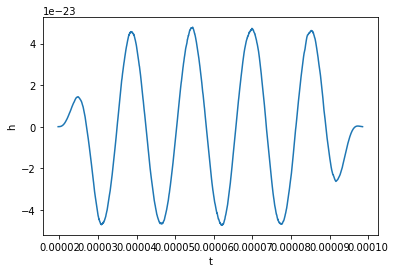

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

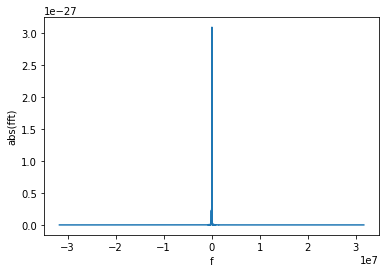

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

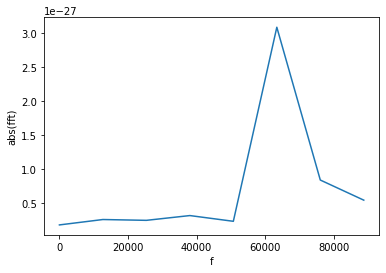

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64186.70


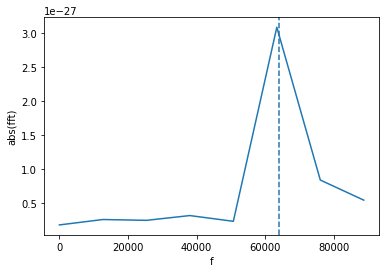

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.091e-27
Maximum with mask 8.363e-28
Length with mask 8
Length after having removed the masked points 7
